<a href="https://colab.research.google.com/github/nawamwenanazifa/2024-DSC-0086-SS/blob/main/K_Means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
 # Prevents Feature Dominance: Without scaling, features with larger numerical ranges (like Income from 0-400)
 # would dominate the clustering process over features with smaller ranges (like Edu from 1-5
from sklearn.cluster import KMeans
#Main Algorithm: This is the core implementation of the K-Means clustering algorithm we're studying.
from sklearn.impute import SimpleImputer
#Handles Missing Data: Our dataset has missing values (shown as empty cells in some rows), which would cause errors in K-Means.




In [11]:
# Load the dataset
df = pd.read_csv('/content/sample_data/cust_seg (1).csv')

# Drop the first unnamed column as it's just an index
df = df.drop(columns=['Unnamed: 0'])

# Display basic info
print(df.head())
print(df.info())

   Customer Id  Age  Edu  Years Employed  Income  Card Debt  Other Debt  \
0            1   41    2               6      19      0.124       1.073   
1            2   47    1              26     100      4.582       8.218   
2            3   33    2              10      57      6.111       5.802   
3            4   29    2               4      19      0.681       0.516   
4            5   47    1              31     253      9.308       8.908   

   Defaulted  DebtIncomeRatio  
0        0.0              6.3  
1        0.0             12.8  
2        1.0             20.9  
3        0.0              6.3  
4        0.0              7.2  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Customer Id      850 non-null    int64  
 1   Age              850 non-null    int64  
 2   Edu              850 non-null    int64  
 3   Years Employed   8

 Data Preprocessing
 handling missing values and select relevant features for clustering.

In [12]:
# Check for missing values
print(df.isnull().sum())

# Handle missing values (e.g., in Defaulted, DebtIncomeRatio)
# We'll use the mean for numerical columns
imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Select features for clustering. Let's use these key customer attributes.
features = ['Age', 'Income', 'Card Debt', 'Other Debt', 'DebtIncomeRatio']
X = df_imputed[features]

# FEATURE SCALING - This is crucial!
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Customer Id          0
Age                  0
Edu                  0
Years Employed       0
Income               0
Card Debt            0
Other Debt           0
Defaulted          150
DebtIncomeRatio      0
dtype: int64


Step 3: Choose the optimal number of clusters (k) using the Elbow Method
We run K-Means for different values of k and plot the Within-Cluster-Sum-of-Squares (WCSS). WCSS is the sum of squared distances of each point to its centroid. We look for the "elbow" – a point where the rate of decrease sharply changes.

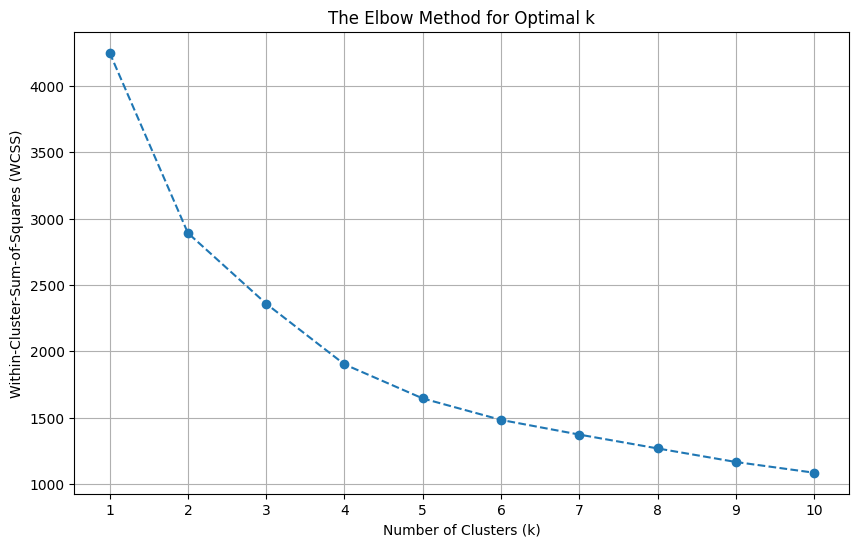

In [13]:
# Use the Elbow Method to find the optimal k
wcss = []
k_range = range(1, 11) # Testing k from 1 to 10

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_) # inertia_ is the WCSS

# Plot the Elbow Graph
plt.figure(figsize=(10, 6))
plt.plot(k_range, wcss, marker='o', linestyle='--')
plt.title('The Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster-Sum-of-Squares (WCSS)')
plt.xticks(k_range)
plt.grid(True)
plt.show()

Interpretation: The plot will likely show a distinct "elbow" around k=3 or k=4. The point where the line starts to flatten out is the optimal k. Let's assume for this example that k=3 is chosen.

Step 4: Apply K-Means with the chosen k

In [14]:
# Apply K-Means with k=3
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)

# Add the cluster labels back to the original dataframe
df_imputed['Cluster'] = clusters

# See the distribution of customers in each cluster
print(df_imputed['Cluster'].value_counts().sort_index())

Cluster
0     97
1    470
2    283
Name: count, dtype: int64


Create visualizations showing cluster profiles
A. Cluster Distribution

/tmp/ipython-input-3330034819.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_imputed, x='Cluster', palette='Set2')


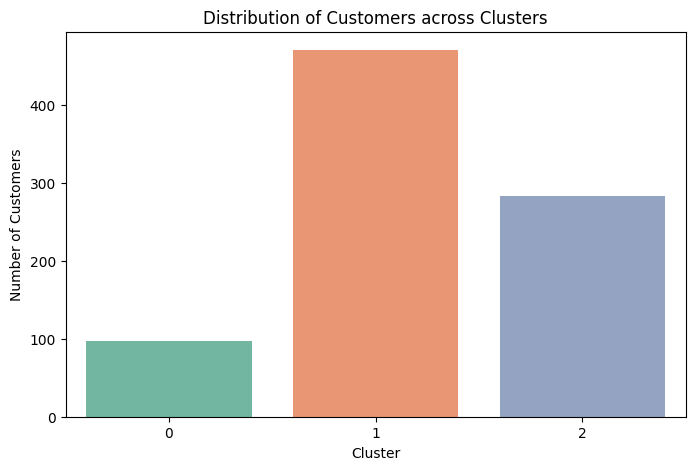

In [15]:
# Bar plot of cluster sizes
plt.figure(figsize=(8, 5))
sns.countplot(data=df_imputed, x='Cluster', palette='Set2')
plt.title('Distribution of Customers across Clusters')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.show()

B. Cluster Profiles (Parallel Coordinates or Boxplots)
This is the most important visualization to understand the characteristics of each

               Age     Income  Card Debt  Other Debt  DebtIncomeRatio
Cluster                                                              
0        40.546392  99.412371   5.554000   10.074381        18.810309
1        29.410638  28.780851   0.907236    1.871398         9.874681
2        42.469965  58.318021   1.325647    2.686166         7.703887


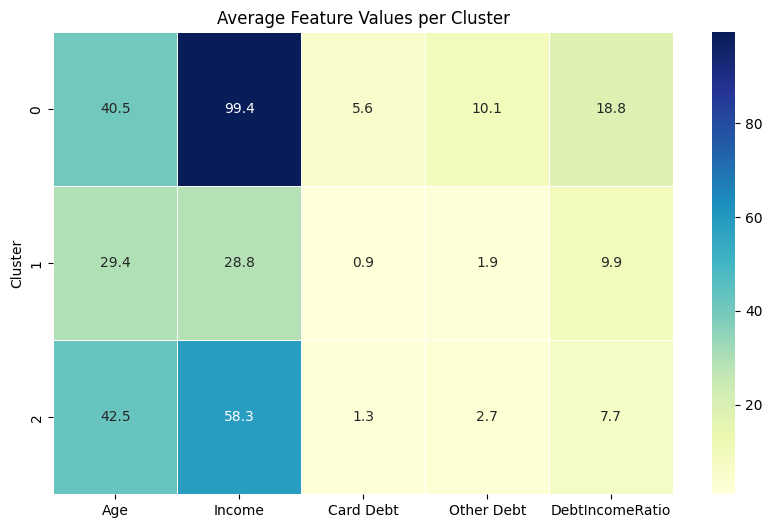

/tmp/ipython-input-1770266262.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[row, col], data=df_imputed, x='Cluster', y=feature, palette='Set2')
/tmp/ipython-input-1770266262.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[row, col], data=df_imputed, x='Cluster', y=feature, palette='Set2')
/tmp/ipython-input-1770266262.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[row, col], data=df_imputed, x='Cluster', y=feature, palette='Set2')
/tmp/ipython-input-1770266262.py:19: FutureWarning: 

Passing `palette

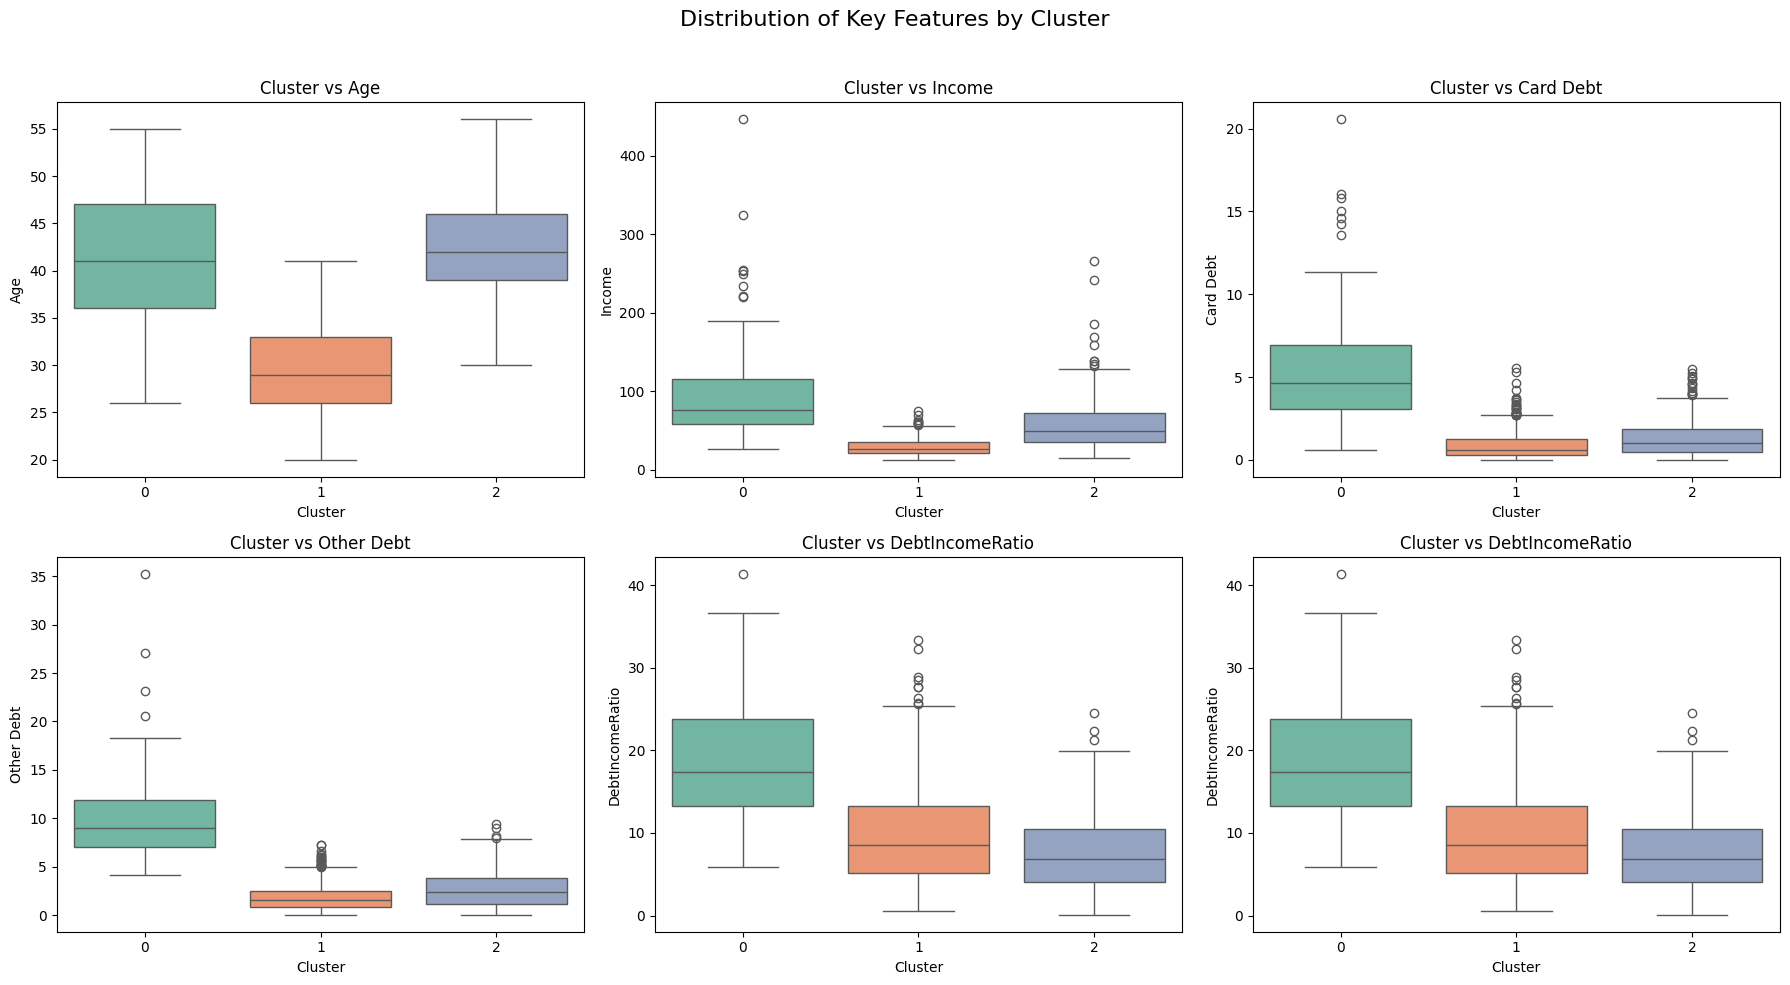

In [16]:
# Let's analyze the mean values of features for each cluster
cluster_profile = df_imputed.groupby('Cluster')[features].mean()
print(cluster_profile)

# Visualize using a heatmap for clarity
plt.figure(figsize=(10, 6))
sns.heatmap(cluster_profile, annot=True, cmap='YlGnBu', fmt='.1f', linewidths=.5)
plt.title('Average Feature Values per Cluster')
plt.show()

# Boxplots for key features across clusters
fig, axes = plt.subplots(2, 3, figsize=(18, 10)) # 2 rows, 3 columns of plots
fig.suptitle('Distribution of Key Features by Cluster', fontsize=16)
features_to_plot = features + ['DebtIncomeRatio'] # Using our feature list

for i, feature in enumerate(features_to_plot):
    row = i // 3
    col = i % 3
    sns.boxplot(ax=axes[row, col], data=df_imputed, x='Cluster', y=feature, palette='Set2')
    axes[row, col].set_title(f'Cluster vs {feature}')

plt.tight_layout(rect=[0, 0, 1, 0.96]) # Adjust layout to fit the main title
plt.show()

C. 2D Scatter Plot (using the two most important features)
Since we have more than 2 features, we can use the two most impactful ones, like Income and DebtIncomeRatio.

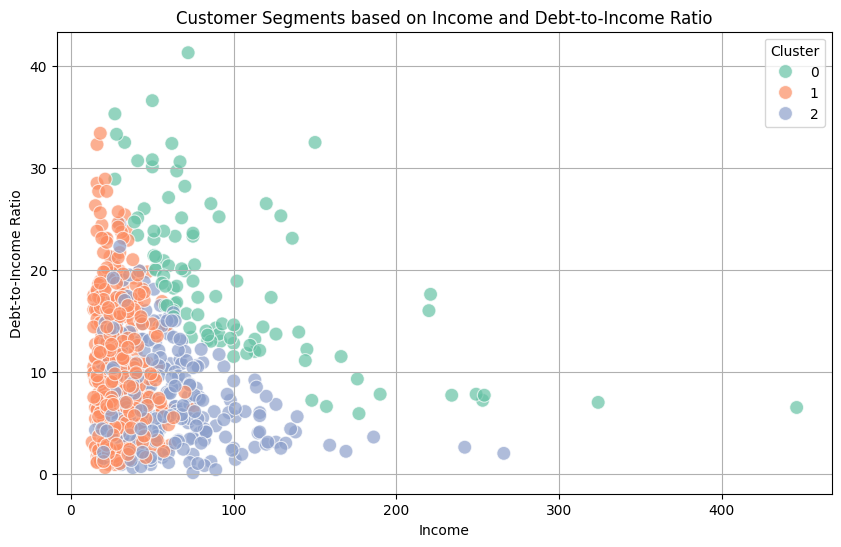

In [17]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_imputed, x='Income', y='DebtIncomeRatio', hue='Cluster', palette='Set2', s=100, alpha=0.7)
plt.title('Customer Segments based on Income and Debt-to-Income Ratio')
plt.xlabel('Income')
plt.ylabel('Debt-to-Income Ratio')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()